# Homework 3 


## AISHWARYA GIRDHAR

Aishwarya.Girdhar@student.uibk.ac.at 

Aish0107

23.10.2018.


### ASTROINFORMATICS

## Problem 1

We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 


## Problem 2

Fit polynomials of up to the 5th order to the provided dataset.
Use BIC to find the best model for this dataset.

## Problem 3 

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. 
Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) 
uniform bin width histogram. 


### Some useful definitions and functions

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.datasets import fetch_LINEAR_geneva
from astroML.plotting import setup_text_plots
from astroML.plotting import hist
from scipy.stats import norm
import seaborn as sns; sns.set()
setup_text_plots(fontsize=8, usetex=False)

## Problem 1: the coin flip


We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

In [3]:
np.random.seed(42)
# results for my coin (0:head, 1: tail - change it according to your results!!!)
flipData = [0, 0, 1, 1, 0, 1, 0, 1]

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

The random flip results are:(0=Heads, 1=Tails):  [0. 1. 0. 1. 1. 0. 0. 0.]


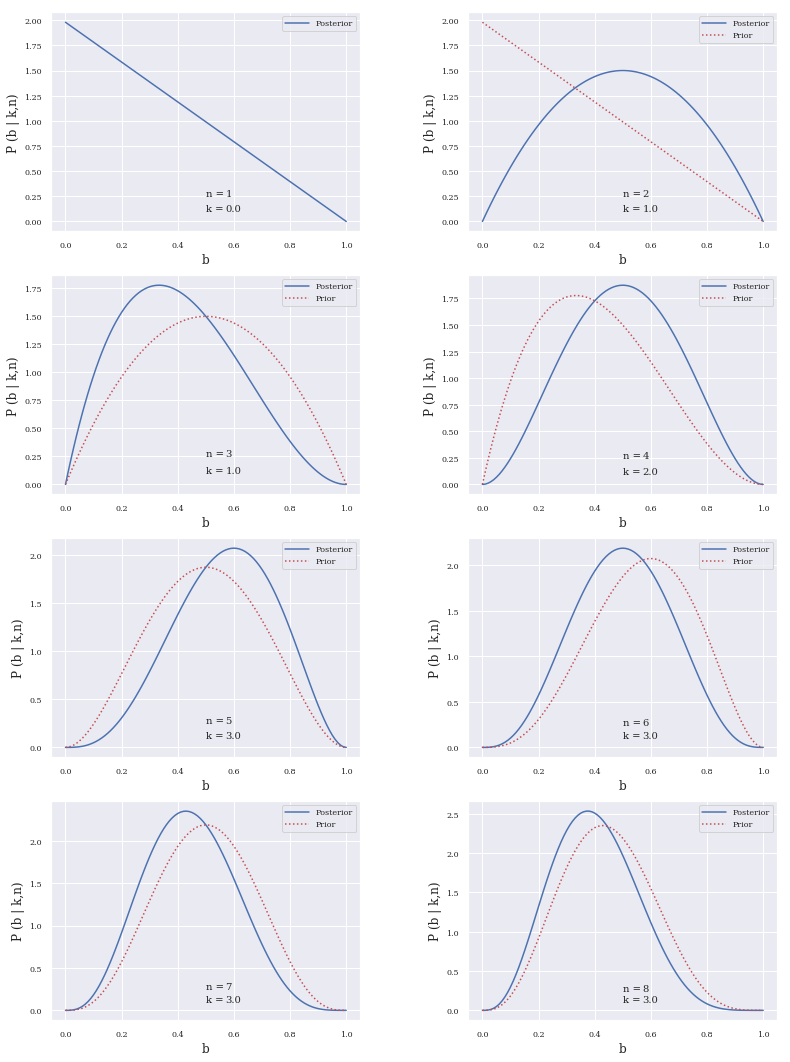

In [12]:
#Generating data for 8 coin flips
import random
flips = 8 # number of flips
data = np.zeros(flips)
for i in range(8):
    data[i] = random.randint(0, 1)
print ("The random flip results are:(0=Heads, 1=Tails): ", data)

wins = np.cumsum(data)
n = np.arange(1, flips+1)

#probability after every draw
k = wins
b = np.linspace(0, 1, 101)
db = b[1] - b[0]

#----------------------------------------------------------------
def prob_estimator(b, n, k):
    #Function to estimate the pdf and cdf for every coin flip
    p_b_f = (b ** k) * ((1 - b) ** (n - k))
    p_b_f /= p_b_f.sum()                     #Normalising
    p_b_f /= db
    cuml_p_b_f = p_b_f.cumsum()    #every index of array stores the sum of the indexes before it and itself.
    cuml_p_b_f /= cuml_p_b_f[-1] 
    return p_b_f, cuml_p_b_f
#------------------------------------------------------------------

#Computing the pdf and the cdf after every coin flip

p_b = [[1 for x in range(flips)] for y in range(len(b))] 
cuml_p_b = [[1 for x in range(flips)] for y in range(len(b))] 

for i in range(flips):
    p_b[i], cuml_p_b[i] = prob_estimator(b, n[i], k[i])
#--------------------------------------------------------------------

#Plotting the probability after every coin flip

fig = plt.figure(figsize=(12, 20))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)

subplots = (421, 422, 423, 424, 425, 426, 427, 428)

for i, subplot in zip(n, subplots):
    ax = fig.add_subplot(subplot)
    ax.plot(b, p_b[i-1], '-b', label = 'Posterior')
    if (i!=1):
        ax.plot(b, p_b[i-2], ':r', label = 'Prior')
    plt.text(0.5, 0.25, ('n = '), {'color': 'k', 'fontsize': 10})
    plt.text(0.5, 0.1, ('k = '), {'color': 'k', 'fontsize': 10})
    ax.annotate(k[i-1], (0.57,0.1), fontsize = 10)     
    ax.annotate(n[i-1], (0.57,0.25), fontsize = 10)     
    ax.set_xlabel("b", fontsize = 12)
    ax.set_ylabel("P (b | k,n)", fontsize = 12)
    ax.legend() 



b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 

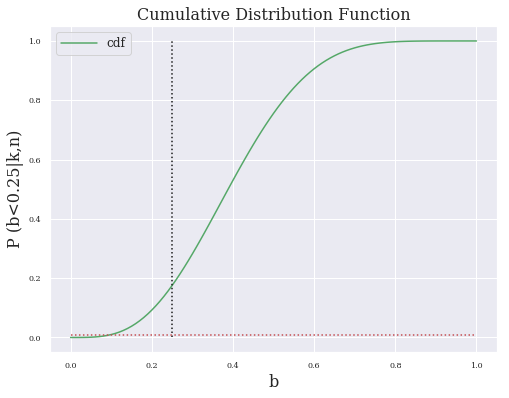

In [13]:
#Plotting the Cumulative Function for p(b<0.25)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(b,cuml_p_b[7], '-g', label = 'cdf')    
ax.set_xlabel("b", fontsize = 16)
ax.set_ylabel("P (b<0.25|k,n)", fontsize = 16)
ax.legend(fontsize=12)
ax.set_title("Cumulative Distribution Function", fontsize =16)
ax.plot([0.25, 0.25], [0,1], ':k', label = 'Deciding Line') 
ax.plot([0.0,1.0], [0.01,0.01], ':r', label = 'Confidence Interval')

***CONCLUSION:*** At confidence interval, <u> $\alpha$= 0.01</u>, we cannot reject the hypothesis.

As can be seen from the graph, P(b<0.25) is where the black dotted line intersects the green curve and that corresponding value is ***greater than*** 0.01, which is shown by the red dotted line. Hence, we cannot reject the hypothesis that the coin strongly prefers heads over tails, however, we also can't say the hypothesis is true. 

## Problem 2: use BIC to find the best polynomial model for a given dataset
Fit polynomials of up to the 5th order to the provided dataset.
Use BIC to find the best model for this dataset.

In [8]:
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x and parameters theta

def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

In [9]:
# generate (noisy) data
np.random.seed(0)
Ndata = 22
x = np.linspace(0, 3, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y) 


In [10]:
# Getting the best-fit parameters for models with degree = 1, 2, 3, 4, 5
theta1 = best_theta(1, x, y, sigma_y)
theta2 = best_theta(2, x, y, sigma_y)
theta3 = best_theta(3, x, y, sigma_y)
theta4 = best_theta(4, x, y, sigma_y)
theta5 = best_theta(5, x, y, sigma_y)


# Generating best fit lines on a fine grid 
xfit = np.linspace(0, 3, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
yfit4 = polynomial_fit(theta4, xfit)
yfit5 = polynomial_fit(theta5, xfit)


# Computing chi2 per degree of freedom: sum{[(y-yfit)/sigma_y]^2} 
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
chi24 = np.sum(((y-polynomial_fit(theta4, x))/sigma_y)**2) 
chi25 = np.sum(((y-polynomial_fit(theta5, x))/sigma_y)**2) 

Linear    ==> chi2 = 349.66 , k = 2.00 , k*lnN = 6.18 , BIC = 355.84
Quadratic ==> chi2 = 99.33 , k = 3.00 , k*lnN = 9.27 , BIC = 108.60
Cubic     ==> chi2 = 10.18 , k = 4.00 , k*lnN = 12.36 , BIC = 22.55
Quartic   ==> chi2 = 10.09 , k = 5.00 , k*lnN = 15.46 , BIC = 25.55
Quintic   ==> chi2 = 9.75 , k = 6.00 , k*lnN = 18.55 , BIC = 28.30


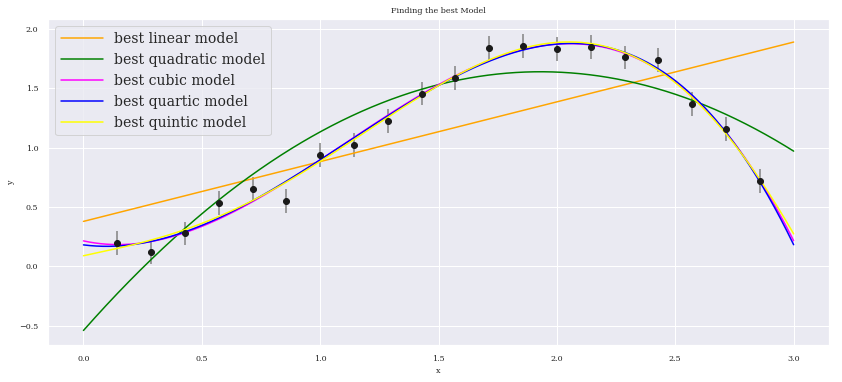

In [11]:
#Computing the BIC for each model
k1 = 2     # For model of degree = 1; linear
k2 = 3     # For model of degree = 2; quadratic
k3 = 4     # For model of degree = 3; cubic
k4 = 5     # For model of degree = 4; quartic
k5 = 6     # For model of degree = 5; quintic

lnN = np.log(Ndata)

klnN1 = k1*lnN
klnN2 = k2*lnN
klnN3 = k3*lnN
klnN4 = k4*lnN
klnN5 = k5*lnN

bic1 = chi21 + klnN1
bic2 = chi22 + klnN2
bic3 = chi23 + klnN3
bic4 = chi24 + klnN4
bic5 = chi25 + klnN5

# Printing the final results
print (("Linear    ==> chi2 = %.2f , k = %.2f , k*lnN = %.2f , BIC = %.2f")%(chi21,k1,klnN1,bic1))
print (("Quadratic ==> chi2 = %.2f , k = %.2f , k*lnN = %.2f , BIC = %.2f")%(chi22,k2,klnN2,bic2))
print (("Cubic     ==> chi2 = %.2f , k = %.2f , k*lnN = %.2f , BIC = %.2f")%(chi23,k3,klnN3,bic3))
print (("Quartic   ==> chi2 = %.2f , k = %.2f , k*lnN = %.2f , BIC = %.2f")%(chi24,k4,klnN4,bic4))
print (("Quintic   ==> chi2 = %.2f , k = %.2f , k*lnN = %.2f , BIC = %.2f")%(chi25,k5,klnN5,bic5))


# Plotting the final results 
fig, ax = plt.subplots(figsize=(14, 6))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model', color = 'orange')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model', color = 'green')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model', color = 'magenta')
ax.plot(xfit, polynomial_fit(theta4, xfit), label='best quartic model', color = 'blue')
ax.plot(xfit, polynomial_fit(theta5, xfit), label='best quintic model', color = 'yellow')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='Finding the best Model');

***Conclusion:*** We see that for the ***Cubic*** model, chi2 is reduced significantly and we have the smallest BIC. 

Similar values of BIC and Chi2 can also be seen for the Quartic and Quintic model. However as per Occam's razor principle, we avoid adding more parameters and would like to chose the simplest model which fits the data. 

In this case, ***Cubic*** model is the best fit.

## Problem 3
Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) uniform bin width histogram. 

Compare Bayesian Blocks Algorithm and classsical histogram
on a sample of periodic variable stars.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import hist

In [3]:
# fetch data
from astroML.datasets import fetch_LINEAR_geneva
data = fetch_LINEAR_geneva()

In [4]:
logp = data['logP']
p = 10**logp
Nmax = len(p)

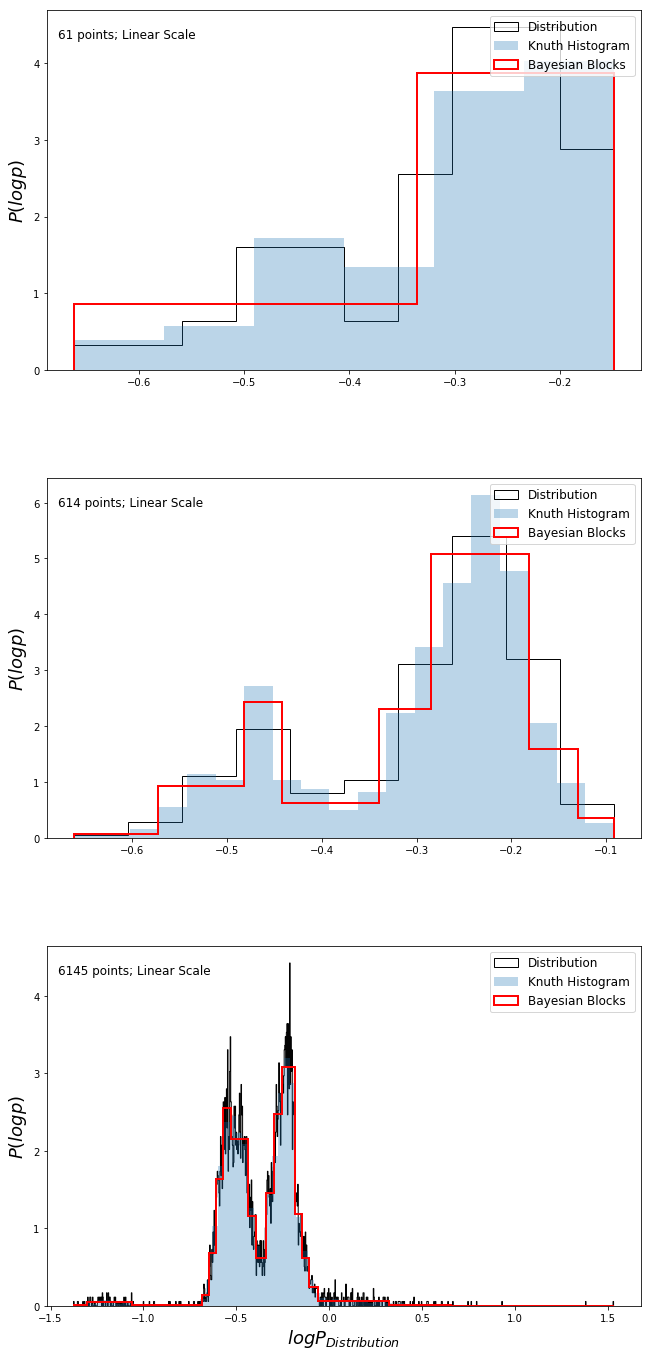

/home/aish/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


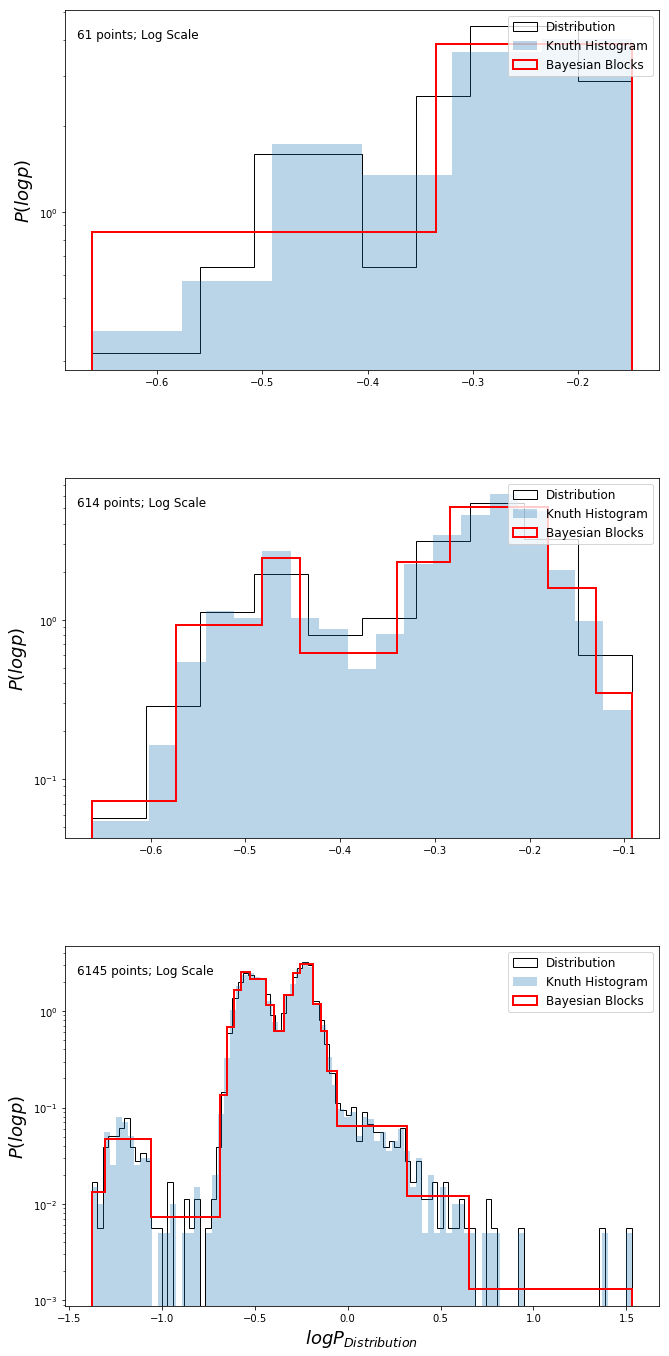

In [16]:

#------------------------------------------------------------
# plot the results
N_values = (int(Nmax/100), int(Nmax/10), int((Nmax-1)/1))

fig = plt.figure(figsize=(10, 40))
fig.subplots_adjust(bottom=0.5, top=0.95, right=0.95, hspace=0.3)
subplots = (311, 312, 313)

# Plotting the data in Linear Scale (P)
for N, subplot in zip(N_values, subplots):
    ax = fig.add_subplot(subplot)
    logpN = logp[:N]
    
    
    #Classical Histogram
    if (subplot == 313):
        plt.hist(logpN, density=True,histtype = 'step',
         color='black', bins = 1000, alpha=0.99,
         label='Distribution')
    else:
        plt.hist(logpN, density=True,histtype = 'step',
         color='black', alpha=0.99,
         label='Distribution')
    #Knuth's Histogram
    hist(logpN, bins='knuth', ax=ax, density=True,
         histtype='stepfilled', alpha=0.3,
         label='Knuth Histogram')
    #Bayesian Blocks Histogram
    hist(logpN, bins='blocks', ax=ax, density=True,
         histtype='step', color='red', alpha=0.99, linewidth = '2',
         label="Bayesian Blocks")
  
    
    ax.text(0.02, 0.95, "%i points; Linear Scale" % N, ha='left', va='top',
            transform=ax.transAxes, fontsize = 12)
    ax.set_ylabel('$P(logp)$', fontsize =18)
    ax.legend(loc='upper right', prop=dict(size=12))

    if subplot == 313:
        ax.set_xlabel('$logP_{Distribution}$', fontsize =18)
    #ax.set_xlim(0,1)
    #ax.set_ylim(0,1)

plt.show()

#log scale plots
fig = plt.figure(figsize=(10, 40))
fig.subplots_adjust(bottom=0.5, top=0.95, right=0.95, hspace=0.3)
for N, subplot in zip(N_values, subplots):
    ax = fig.add_subplot(subplot, yscale = 'log')
    logpN = logp[:N]

    #Plotting Errors
    ax.errorbar(logpN, -0.01 + 0*logpN, xerr=0.0, yerr=0.005, ecolor='black', lw=1)
    #Classsical Histogram
    if (subplot == 313):
        plt.hist(logpN, density=True,histtype = 'step',
         color='black', bins = 100, alpha=0.99,
         label='Distribution')
    else:
        plt.hist(logpN, density=True,histtype = 'step',
         color='black', alpha=0.99,
         label='Distribution')
    #Knuth's Histogram
    hist(logpN, bins='knuth', ax=ax, density=True,
         histtype='stepfilled', alpha=0.3,
         label='Knuth Histogram')
    #Bayesian Blocks
    hist(logpN, bins='blocks', ax=ax, density=True,
         histtype='step', color='red', alpha=0.99, lw=2,
         label="Bayesian Blocks")
  
    ax.text(0.02, 0.95, "%i points; Log Scale" % N, ha='left', va='top',
            transform=ax.transAxes, fontsize = 12)
    ax.set_ylabel('$P(logp)$', fontsize=18)
    ax.legend(loc='upper right', prop=dict(size=12))

    if subplot == 313:
        ax.set_xlabel('$logP_{Distribution}$', fontsize = 18)
    #ax.set_xlim(-0.8,0.1)

plt.show()

***Conclusion***: 

***In Linear Scale:*** Both Knuth and Bayesian Blocks seem to be a good technique.

***In Log Scale:*** As can be seen in the third plot, with all the points plotted, Knuth is a better estimate since Bayesian blocks(in red) misses the peaks towards the higher ranges.

### Finito

Submitted on: 23.10.2018.